In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun_temp= session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
jun_temp= session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(jun_temp)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(jun_temp, columns=['date','temperature'])
june_df.set_index(june_df['date'], inplace=True)
print(june_df.to_string(index=False))

june_df

      date  temperature
2010-06-01         78.0
2010-06-02         76.0
2010-06-03         78.0
2010-06-04         76.0
2010-06-05         77.0
2010-06-06         78.0
2010-06-07         77.0
2010-06-08         78.0
2010-06-09         78.0
2010-06-10         79.0
2010-06-11         78.0
2010-06-12         78.0
2010-06-13         78.0
2010-06-14         77.0
2010-06-15         78.0
2010-06-16         78.0
2010-06-17         77.0
2010-06-18         77.0
2010-06-19         82.0
2010-06-20         78.0
2010-06-21         78.0
2010-06-22         78.0
2010-06-23         78.0
2010-06-24         78.0
2010-06-25         77.0
2010-06-26         76.0
2010-06-27         78.0
2010-06-28         78.0
2010-06-29         78.0
2010-06-30         78.0
2011-06-01         77.0
2011-06-02         78.0
2011-06-03         73.0
2011-06-04         70.0
2011-06-05         76.0
2011-06-06         77.0
2011-06-07         77.0
2011-06-08         77.0
2011-06-09         77.0
2011-06-10         78.0
2011-06-11      

,date,temperature
date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0
...,...,...
2017-06-26,2017-06-26,79.0
2017-06-27,2017-06-27,74.0
2017-06-28,2017-06-28,74.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [8]:
june_df.isnull().sum()

date           0
temperature    0
dtype: int64

array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

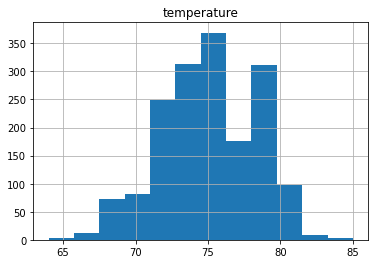

In [9]:
june_df.hist(bins=12)

In [10]:
jun_prcp= session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(jun_prcp)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [11]:
jun_prcp_df = pd.DataFrame(jun_prcp, columns=['date','precipitation'])
jun_prcp_df.set_index(jun_prcp_df['date'], inplace=True)
print(jun_prcp_df.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-06           0.00
2010-06-07           0.00
2010-06-08           0.00
2010-06-09           0.00
2010-06-10           0.00
2010-06-11           0.00
2010-06-12           0.00
2010-06-13           0.00
2010-06-14           0.00
2010-06-15           0.00
2010-06-16           0.00
2010-06-17           0.00
2010-06-18           0.00
2010-06-19           0.00
2010-06-20           0.00
2010-06-21           0.00
2010-06-22           0.00
2010-06-23           0.00
2010-06-24           0.00
2010-06-25           0.00
2010-06-26           0.02
2010-06-27           0.00
2010-06-28           0.00
2010-06-29           0.00
2010-06-30           0.00
2011-06-01           0.07
2011-06-02           0.00
2011-06-03           0.56
2011-06-04           0.89
2011-06-05           0.00
2011-06-06           0.00
2011-06-07           0.00
2011-06-08  

In [12]:
jun_prcp_df.isnull().sum()

date               0
precipitation    126
dtype: int64

In [13]:
jun_prcp_df.loc[jun_prcp_df['precipitation'] >= 1]

,date,precipitation
date,,
2011-06-04,2011-06-04,4.43
2011-06-05,2011-06-05,4.02
2013-06-26,2013-06-26,1.00
2011-06-03,2011-06-03,1.75
2011-06-04,2011-06-04,1.14
2011-06-05,2011-06-05,3.60
2015-06-30,2015-06-30,1.10
2011-06-03,2011-06-03,1.71
2015-06-04,2015-06-04,1.24


In [14]:
jun_prcp_df.loc[jun_prcp_df['precipitation'] >= 1].count()

date             39
precipitation    39
dtype: int64

In [15]:
jun_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## D2: Determine the Summary Statistics for December

In [16]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp= session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)


In [17]:
# 7. Convert the December temperatures to a list.
dec_temp= session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(dec_temp)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temp, columns=['date','temperature'])
dec_df.set_index(dec_df['date'], inplace=True)
print(dec_df.to_string(index=False))

dec_df

      date  temperature
2010-12-01         76.0
2010-12-03         74.0
2010-12-04         74.0
2010-12-06         64.0
2010-12-07         64.0
2010-12-08         67.0
2010-12-09         77.0
2010-12-10         66.0
2010-12-11         69.0
2010-12-12         68.0
2010-12-13         68.0
2010-12-14         71.0
2010-12-15         74.0
2010-12-16         67.0
2010-12-17         66.0
2010-12-18         69.0
2010-12-19         71.0
2010-12-23         70.0
2010-12-24         70.0
2010-12-26         74.0
2010-12-27         74.0
2010-12-28         71.0
2010-12-29         75.0
2010-12-30         75.0
2010-12-31         72.0
2011-12-01         69.0
2011-12-02         68.0
2011-12-03         73.0
2011-12-04         74.0
2011-12-05         73.0
2011-12-06         73.0
2011-12-07         73.0
2011-12-08         73.0
2011-12-09         71.0
2011-12-10         73.0
2011-12-11         73.0
2011-12-12         77.0
2011-12-13         72.0
2011-12-14         71.0
2011-12-15         73.0
2011-12-16      

,date,temperature
date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0
...,...,...
2016-12-27,2016-12-27,71.0
2016-12-28,2016-12-28,71.0
2016-12-29,2016-12-29,69.0


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
dec_df.isnull().sum()

date           0
temperature    0
dtype: int64

array([[<AxesSubplot:title={'center':'temperature'}>]], dtype=object)

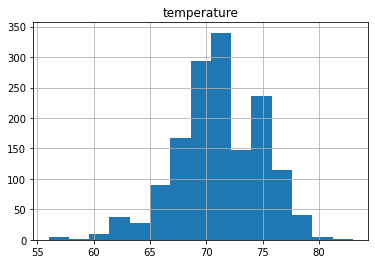

In [21]:
dec_df.hist(bins=15)

In [22]:
dec_prcp= session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(dec_prcp)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [23]:
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date','precipitation'])
dec_prcp_df.set_index(dec_prcp_df['date'], inplace=True)
print(dec_prcp_df.to_string(index=False))

      date  precipitation
2010-12-01           0.04
2010-12-03           0.00
2010-12-04           0.00
2010-12-06           0.00
2010-12-07           0.00
2010-12-08           0.00
2010-12-09           0.00
2010-12-10           1.58
2010-12-11           0.77
2010-12-12           0.00
2010-12-13           0.00
2010-12-14           0.00
2010-12-15           0.00
2010-12-16           0.00
2010-12-17           0.00
2010-12-18           0.00
2010-12-19           1.40
2010-12-23           0.00
2010-12-24           0.00
2010-12-26            NaN
2010-12-27           0.13
2010-12-28           0.55
2010-12-29           0.06
2010-12-30           0.01
2010-12-31           0.00
2011-12-01           0.03
2011-12-02           0.08
2011-12-03           0.00
2011-12-04           0.00
2011-12-05           0.00
2011-12-06           0.00
2011-12-07           0.00
2011-12-08           0.00
2011-12-09           0.13
2011-12-10           0.07
2011-12-11           0.07
2011-12-12           0.08
2011-12-13  

In [24]:
dec_prcp_df.isnull().sum()

date               0
precipitation    112
dtype: int64

In [25]:
dec_prcp_df.loc[dec_prcp_df['precipitation'] >= 1].count()

date             88
precipitation    88
dtype: int64

In [26]:
dec_prcp_df.loc[dec_prcp_df['precipitation'] >= 1]

,date,precipitation
date,,
2010-12-10,2010-12-10,1.58
2010-12-19,2010-12-19,1.40
2013-12-02,2013-12-02,2.01
2013-12-16,2013-12-16,1.10
2010-12-10,2010-12-10,1.95
...,...,...
2016-12-22,2016-12-22,1.24
2016-12-24,2016-12-24,1.08
2016-12-26,2016-12-26,1.48


In [27]:
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [28]:
# What are the most active stations?
# List the stations and the counts in descending order.

#/1.
session.query()

#/2. listing the stations and count
session.query(Measurement.station, func.count(Measurement.station))

#/3. group the data by stations to filter to what is needed
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station)

#/4. order the data by descennding order
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc())

#/5. return the results
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]